In [2]:
import requests
import json
import pandas as pd
from pandas import concat
from pandas import merge
from pandas import DataFrame
from matplotlib import pyplot as plt
import numpy as np

r = requests.get('http://itpaper.co.kr/demo/covid19/all.php')

r.encoding = 'utf -8'
코로나현황dict = json.loads(r.text)
코로나현황dict

코로나현황df = DataFrame()
for i in 코로나현황dict['data']:
    tmp_df = DataFrame(코로나현황dict['data'][i]).reset_index()
    tmp_df['region'] = i
    코로나현황df = concat([코로나현황df, tmp_df])
    
week_confirmed = pd.pivot_table(코로나현황df,index = 'date',columns = 'region',values = 'confirmed').tail(7)
week_confirmed

week_confirmed_acc = pd.pivot_table(코로나현황df,index = 'date',columns = 'region',values = 'confirmed_acc').tail(7)
week_confirmed_acc

region,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
date,,,,,,,,,,,,,,,,,
20210516,2919,36768,4433,4447,2599,9479,1906,5413,41043,399,2368,5941,1296,2104,871,3256,2759
20210517,2954,36918,4463,4474,2626,9498,1908,5425,41238,399,2384,5955,1316,2113,886,3272,2782
20210518,2979,37055,4479,4497,2637,9521,1920,5438,41410,403,2390,5971,1328,2120,897,3287,2795
20210519,2995,37219,4495,4521,2641,9544,1930,5465,41659,406,2417,5994,1338,2129,901,3304,2816
20210520,3003,37406,4507,4554,2656,9553,1938,5482,41901,415,2442,6007,1345,2136,907,3323,2829
20210521,3010,37570,4525,4565,2669,9572,1953,5497,42073,416,2455,6019,1362,2152,912,3364,2841
20210522,3039,37735,4546,4581,2684,9628,1958,5525,42281,416,2484,6034,1378,2164,919,3381,2847


In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

daily_confirm = DataFrame(week_confirmed.sum(axis = 1), columns=['확진자수'])
daily_confirm

daily_confirm_acc = DataFrame(week_confirmed_acc.sum(axis = 1), columns=['누적확진자수'])
daily_confirm_acc

,누적확진자수
date,
20210516,128001
20210517,128611
20210518,129127
20210519,129774
20210520,130404
20210521,130955
20210522,131600


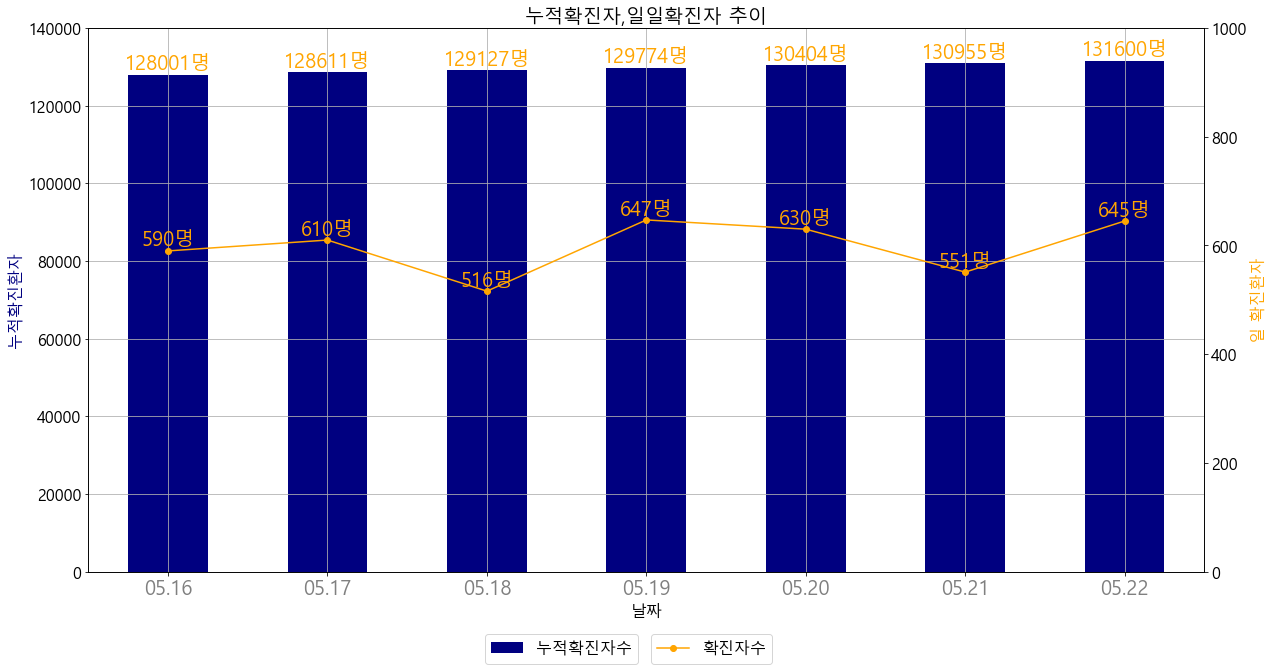

In [22]:
fig, ax1 = plt.subplots(1,1)

xpos = np.arange(len(daily_confirm_acc.index))
xlabels = []

for i in daily_confirm_acc.index:
    xlabels.append(i[4:6] + '.' + i[6:])

# ax1에 겹쳐지는 서브플롯 생성
ax2 = ax1.twinx()

daily_confirm_acc.plot.bar(ax = ax1,rot = 0, color = 'navy')
ax1.title.set_text('누적확진자,일일확진자 추이')
ax1.set_xlabel('날짜')
ax1.set_ylabel('누적확진환자', color='navy')
ax1.set_ylim([0,140000])
ax1.set_xticks(xpos)
ax1.set_xticklabels(xlabels, fontsize = 20, color = 'gray')
ax1.legend( bbox_to_anchor=(0.5,-0.1))
ax1.grid()

for x, y in enumerate( list(daily_confirm_acc['누적확진자수']) ):
    txt = "%d명" %y
    ax1.text(x, y, txt, fontsize=20, color="orange", 
                    horizontalalignment='center', verticalalignment='bottom')

daily_confirm.plot(ax = ax2, color = 'orange', marker ='o')
ax2.set_ylabel('일 확진환자', color = 'orange')
ax2.set_ylim([0,1000])
ax2.set_xticks(xpos)
ax2.set_xticklabels(xlabels, fontsize = 20, color = 'gray')
ax2.legend( bbox_to_anchor=(0.62,-0.1))
for x, y in enumerate( list(daily_confirm['확진자수']) ):
    txt = "%d명" %y
    ax2.text(x, y, txt, fontsize=20, color="orange", 
                    horizontalalignment='center', verticalalignment='bottom')
